## Ames Housing Dataset

### Data Preparation & Feature Engineering

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = '../../GitHub/Python-Data-Science/DATA/'
df = pd.read_csv(path+'Ames_Housing_Data.csv')
df.shape

(2930, 81)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

In [4]:
df.head()

PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  526301100           20        RL         141.0     31770   Pave   NaN   
1  526350040           20        RH          80.0     11622   Pave   NaN   
2  526351010           20        RL          81.0     14267   Pave   NaN   
3  526353030           20        RL          93.0     11160   Pave   NaN   
4  527105010           60        RL          74.0     13830   Pave   NaN   

  Lot Shape Land Contour Utilities  ... Pool Area Pool QC  Fence Misc Feature  \
0       IR1          Lvl    AllPub  ...         0     NaN    NaN          NaN   
1       Reg          Lvl    AllPub  ...         0     NaN  MnPrv          NaN   
2       IR1          Lvl    AllPub  ...         0     NaN    NaN         Gar2   
3       Reg          Lvl    AllPub  ...         0     NaN    NaN          NaN   
4       IR1          Lvl    AllPub  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold  Sale Type  Sale Condition  SalePrice  
0        0       5    2010        WD           Normal     215000  
1        0       6    2010        WD           Normal     105000  
2    12500       6    2010        WD           Normal     172000  
3        0       4    2010        WD           Normal     244000  
4        0       3    2010        WD           Normal     189900  

[5 rows x 81 columns]

<AxesSubplot:>

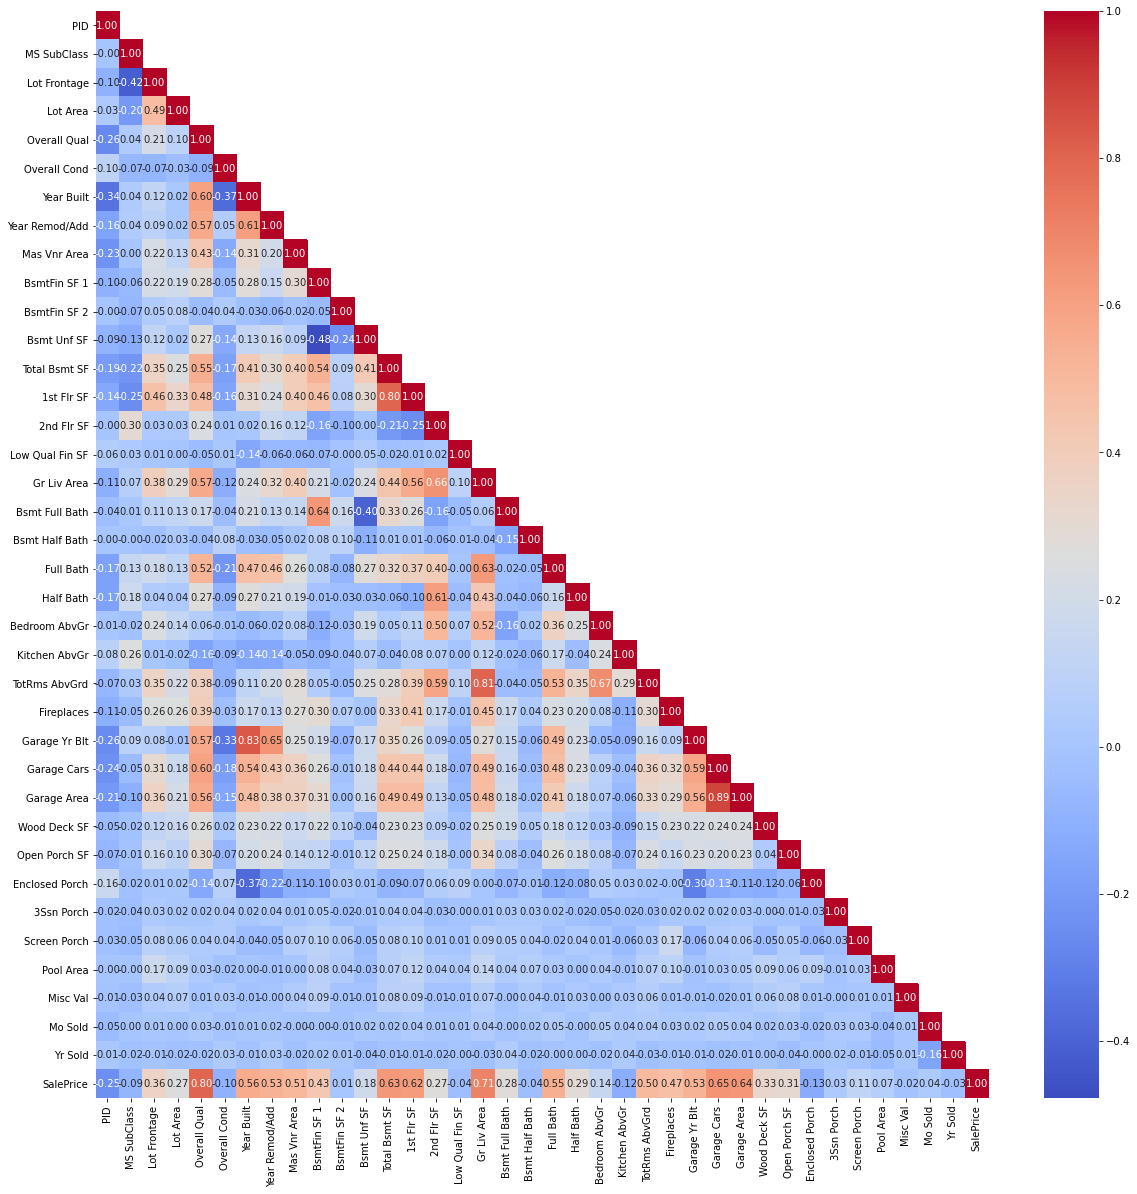

In [5]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), mask=np.triu(np.ones(df.corr().shape), k=1), cmap='coolwarm', annot=True, fmt='.2f')

In [6]:
df.corr()['SalePrice'].sort_values()

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

In [7]:
#sns.scatterplot(data=df, x='Overall Qual', y='SalePrice')

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

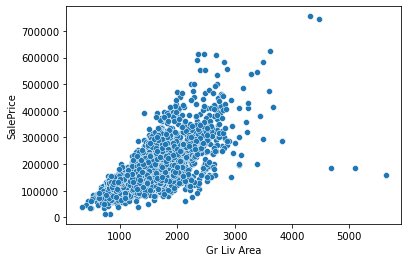

In [8]:
sns.scatterplot(data=df, x='Gr Liv Area', y='SalePrice')

In [9]:
import plotly.express as px
px.scatter(data_frame=df, x='Gr Liv Area', y='SalePrice', hover_name = 'PID')

In [10]:
px.scatter(data_frame=df, x='Overall Qual', y='SalePrice', hover_name = 'PID')

In [11]:
display(df.dtypes.unique())
df.columns[df.dtypes != 'object']

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

Index(['PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice'],
      dtype='object')

#### Outliers

In [12]:
df[(df['Overall Qual']>8) & (df['SalePrice'] <200000)]

PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
1182  533350090           60        RL           NaN     24572   Pave   NaN   
1498  908154235           60        RL         313.0     63887   Pave   NaN   
2180  908154195           20        RL         128.0     39290   Pave   NaN   
2181  908154205           60        RL         130.0     40094   Pave   NaN   

     Lot Shape Land Contour Utilities  ... Pool Area Pool QC Fence  \
1182       IR1          Lvl    AllPub  ...         0     NaN   NaN   
1498       IR3          Bnk    AllPub  ...       480      Gd   NaN   
2180       IR1          Bnk    AllPub  ...         0     NaN   NaN   
2181       IR1          Bnk    AllPub  ...         0     NaN   NaN   

     Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  Sale Condition  \
1182          NaN        0       6    2008        WD           Family   
1498          NaN        0       1    2008        New         Partial   
2180         Elev    17000      10    2007        New         Partial   
2181          NaN        0      10    2007        New         Partial   

      SalePrice  
1182     150000  
1498     160000  
2180     183850  
2181     184750  

[4 rows x 81 columns]

In [13]:
df[(df['Gr Liv Area']>4000) & (df['SalePrice'] <200000)]

PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
1498  908154235           60        RL         313.0     63887   Pave   NaN   
2180  908154195           20        RL         128.0     39290   Pave   NaN   
2181  908154205           60        RL         130.0     40094   Pave   NaN   

     Lot Shape Land Contour Utilities  ... Pool Area Pool QC Fence  \
1498       IR3          Bnk    AllPub  ...       480      Gd   NaN   
2180       IR1          Bnk    AllPub  ...         0     NaN   NaN   
2181       IR1          Bnk    AllPub  ...         0     NaN   NaN   

     Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  Sale Condition  \
1498          NaN        0       1    2008        New         Partial   
2180         Elev    17000      10    2007        New         Partial   
2181          NaN        0      10    2007        New         Partial   

      SalePrice  
1498     160000  
2180     183850  
2181     184750  

[3 rows x 81 columns]

In [14]:
# Removing 3 overlapping outliers
drop_ind = df[(df['Gr Liv Area']>4000) & (df['SalePrice'] <200000)].index
display(drop_ind)

df.drop(index=drop_ind, inplace=True)

Int64Index([1498, 2180, 2181], dtype='int64')

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

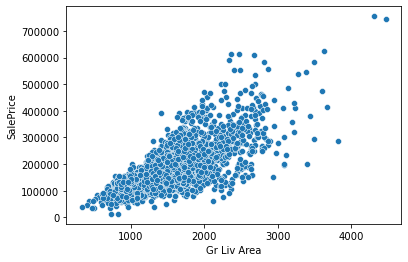

In [15]:
sns.scatterplot(data=df, x='Gr Liv Area', y='SalePrice')

In [16]:
df.shape

(2927, 81)

#### Missing values

In [17]:
with open('../../GitHub/Python-Data-Science/DATA/Ames_Housing_Feature_Description.txt', 'r') as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [18]:
def missing_pct(df):
    print(df.isna().mean()[df.isna().mean() >0].sort_values(ascending=False))
    return df.isna().mean()[df.isna().mean() >0].sort_values(ascending=False)

In [19]:
missing_data = missing_pct(df)

# Basement related fields
# Garage related fiels
# Masonly Veneer
# Others

Pool QC           0.995900
Misc Feature      0.964127
Alley             0.932354
Fence             0.804578
Fireplace Qu      0.485822
Lot Frontage      0.167407
Garage Yr Blt     0.054322
Garage Cond       0.054322
Garage Qual       0.054322
Garage Finish     0.054322
Garage Type       0.053639
Bsmt Exposure     0.028357
BsmtFin Type 2    0.027673
Bsmt Cond         0.027332
Bsmt Qual         0.027332
BsmtFin Type 1    0.027332
Mas Vnr Type      0.007858
Mas Vnr Area      0.007858
Bsmt Half Bath    0.000683
Bsmt Full Bath    0.000683
Garage Cars       0.000342
BsmtFin SF 2      0.000342
BsmtFin SF 1      0.000342
Bsmt Unf SF       0.000342
Total Bsmt SF     0.000342
Garage Area       0.000342
Electrical        0.000342
dtype: float64


In [20]:
1/len(df)  # 0.000342 represents 1 row

0.00034164673727365904

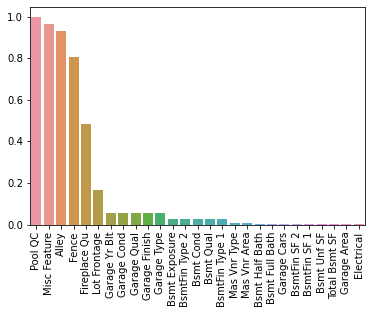

In [21]:
sns.barplot(x=missing_data.index, y=missing_data)
plt.xticks(rotation=90);

In [22]:
# Basement = NO BASEMENT:
    # Bsmt Exposure     0.028357 - 'str' none
    # BsmtFin Type 2    0.027673 - 'str' none
    # Bsmt Cond         0.027332 - 'str' none
    # Bsmt Qual         0.027332 - 'str' none
    # BsmtFin Type 1    0.027332 - 'str' none
    # Bsmt Half Bath    0.000683 - replace with 0
    # Bsmt Full Bath    0.000683 - replace with 0
    # BsmtFin SF 2      0.000342 - replace with 0
    # BsmtFin SF 1      0.000342 - replace with 0
    # Bsmt Unf SF       0.000342 - replace with 0
    # Total Bsmt SF     0.000342 - replace with 0
    
# Basement related features with missing values:
col_bsmt = missing_data.index[missing_data.index.str.contains('Bsmt')]
display(df[col_bsmt].dtypes)
df.loc[df[col_bsmt].isnull().any(axis=1), col_bsmt].head()

Bsmt Exposure      object
BsmtFin Type 2     object
Bsmt Cond          object
Bsmt Qual          object
BsmtFin Type 1     object
Bsmt Half Bath    float64
Bsmt Full Bath    float64
BsmtFin SF 2      float64
BsmtFin SF 1      float64
Bsmt Unf SF       float64
Total Bsmt SF     float64
dtype: object

Bsmt Exposure BsmtFin Type 2 Bsmt Cond Bsmt Qual BsmtFin Type 1  \
66            NaN            Unf        TA        Gd            Unf   
83            NaN            NaN       NaN       NaN            NaN   
154           NaN            NaN       NaN       NaN            NaN   
206           NaN            NaN       NaN       NaN            NaN   
243           NaN            NaN       NaN       NaN            NaN   

     Bsmt Half Bath  Bsmt Full Bath  BsmtFin SF 2  BsmtFin SF 1  Bsmt Unf SF  \
66              0.0             0.0           0.0           0.0       1595.0   
83              0.0             0.0           0.0           0.0          0.0   
154             0.0             0.0           0.0           0.0          0.0   
206             0.0             0.0           0.0           0.0          0.0   
243             0.0             0.0           0.0           0.0          0.0   

     Total Bsmt SF  
66          1595.0  
83             0.0  
154            0.0  
206            0.0  
243            0.0

In [23]:
# Garage related features with missing values
#NO GARAGE
    # Garage Yr Blt     0.054322 - replace with Float for dummy year
    # Garage Cond       0.054322 - 'str' none
    # Garage Qual       0.054322 - 'str' none
    # Garage Finish     0.054322 - 'str' none
    # Garage Type       0.053639 - 'str' none
    # Garage Cars       0.000342 - replace with 0
    # Garage Area       0.000342 - replace with 0

# These two features have overlapping missing data points
col_gar = missing_data.index[missing_data.index.str.contains('Garage')]
df.loc[df[col_gar].isna().any(axis=1), col_gar].head()

Garage Yr Blt Garage Cond Garage Qual Garage Finish Garage Type  \
27             NaN         NaN         NaN           NaN         NaN   
119            NaN         NaN         NaN           NaN         NaN   
125            NaN         NaN         NaN           NaN         NaN   
129            NaN         NaN         NaN           NaN         NaN   
130            NaN         NaN         NaN           NaN         NaN   

     Garage Cars  Garage Area  
27           0.0          0.0  
119          0.0          0.0  
125          0.0          0.0  
129          0.0          0.0  
130          0.0          0.0

In [24]:
# Masonly Veneer - assume missing values are same as 'None' type
    # Mas Vnr Type      0.007858 - same 23 records for both
    # Mas Vnr Area      0.007858

# These two features have overlapping missing data points
df.loc[df['Mas Vnr Area'].isna(), ['Mas Vnr Area', 'Mas Vnr Area']]

Mas Vnr Area  Mas Vnr Area
55             NaN           NaN
484            NaN           NaN
517            NaN           NaN
538            NaN           NaN
867            NaN           NaN
1095           NaN           NaN
1119           NaN           NaN
1122           NaN           NaN
1127           NaN           NaN
1184           NaN           NaN
1454           NaN           NaN
1727           NaN           NaN
1751           NaN           NaN
1783           NaN           NaN
1799           NaN           NaN
1839           NaN           NaN
1840           NaN           NaN
2229           NaN           NaN
2260           NaN           NaN
2382           NaN           NaN
2392           NaN           NaN
2455           NaN           NaN
2823           NaN           NaN

In [25]:
# 1 record with null for 'Electrical'
df[df['Electrical'].isna()]

PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
1577  916386080           80        RL          73.0      9735   Pave   NaN   

     Lot Shape Land Contour Utilities  ... Pool Area Pool QC Fence  \
1577       Reg          Lvl    AllPub  ...         0     NaN   NaN   

     Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  Sale Condition  \
1577          NaN        0       5    2008        WD           Normal   

      SalePrice  
1577     167500  

[1 rows x 81 columns]

In [26]:
# Other high % missing columns
    # Pool QC           0.995900 - no pool - 90%+ DROP
    # Misc Feature      0.964127 - no misc feature - 90%+ DROP
    # Alley             0.932354 - no alley access - 90%+ DROP
    # Fence             0.804578 - no fence - replace with 'str' none
    # Fireplace Qu      0.485822 - no fireplace
    # Lot Frontage      0.167407 - Linear feet of street connected to property
    
col_high = ['Pool QC','Misc Feature','Alley','Fence','Fireplace Qu','Lot Frontage']
display(col_high)
display(df[col_high].dtypes)

['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu', 'Lot Frontage']

Pool QC          object
Misc Feature     object
Alley            object
Fence            object
Fireplace Qu     object
Lot Frontage    float64
dtype: object

#### Filling Missing values

In [27]:
# Fill String Columns
col_miss_str = ['BsmtFin Type 2', 'Bsmt Cond', 'Bsmt Qual', 'BsmtFin Type 1', 'Bsmt Exposure',
                'Garage Cond', 'Garage Qual', 'Garage Finish', 'Garage Type',
                'Mas Vnr Type', 'Fireplace Qu']

# Fill Numeric Columns
    # Garage Yr Blt - dummy value of 0 for NO GARAGE cases
col_miss_num = ['Bsmt Half Bath', 'Bsmt Full Bath', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Total Bsmt SF', 'Bsmt Unf SF',
                'Garage Cars', 'Garage Area', 'Garage Yr Blt',
                'Mas Vnr Area']

# Dropping Columns with high missing %age
col_drop = ['PID', 'Pool QC', 'Misc Feature', 'Alley', 'Fence']   # PID is index column

In [28]:
df[col_miss_str] = df[col_miss_str].fillna('None')
df[col_miss_num] = df[col_miss_num].fillna(0)
df.drop(columns=col_drop, inplace=True)

In [29]:
missing_pct(df)

Lot Frontage    0.167407
Electrical      0.000342
dtype: float64


Lot Frontage    0.167407
Electrical      0.000342
dtype: float64

In [30]:
df = df.dropna(axis=0,subset= ['Electrical'])

missing_pct(df)

Lot Frontage    0.167464
dtype: float64


Lot Frontage    0.167464
dtype: float64

<AxesSubplot:xlabel='Lot Frontage', ylabel='Neighborhood'>

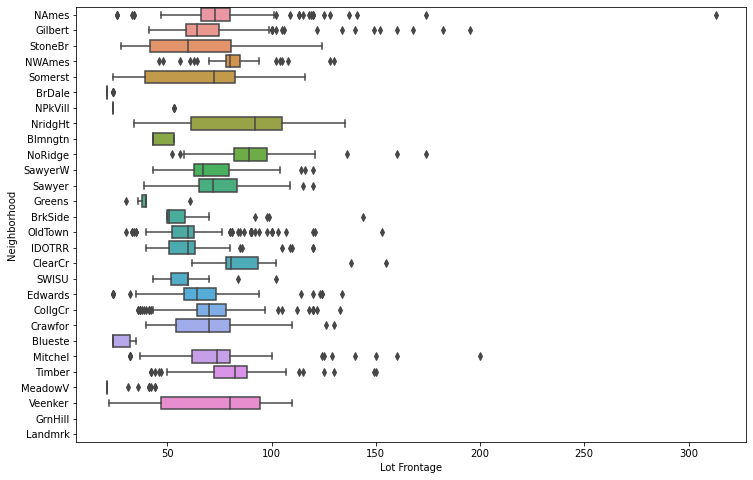

In [31]:
# Hypothesis - Lot Frontage is tied to Neighborhood
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x='Lot Frontage', y='Neighborhood' )

In [32]:
df.groupby(by='Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.241379
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [33]:
# Transform is similar to Apply method
df['Lot Frontage'] = df.groupby(by='Neighborhood')['Lot Frontage'].transform(lambda x: x.fillna(x.mean()))
missing_pct(df)

Lot Frontage    0.001025
dtype: float64


Lot Frontage    0.001025
dtype: float64

In [34]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)
missing_pct(df)

Series([], dtype: float64)


Series([], dtype: float64)

#### Updating DF - changing categorical to dummies

In [35]:
# Convert MSSubClass - which is integer coding to string type
df['MS SubClass'] = df['MS SubClass'].apply(str)

In [36]:
df.select_dtypes(include='object').head()

MS SubClass MS Zoning Street Lot Shape Land Contour Utilities Lot Config  \
0          20        RL   Pave       IR1          Lvl    AllPub     Corner   
1          20        RH   Pave       Reg          Lvl    AllPub     Inside   
2          20        RL   Pave       IR1          Lvl    AllPub     Corner   
3          20        RL   Pave       Reg          Lvl    AllPub     Corner   
4          60        RL   Pave       IR1          Lvl    AllPub     Inside   

  Land Slope Neighborhood Condition 1  ... Kitchen Qual Functional  \
0        Gtl        NAmes        Norm  ...           TA        Typ   
1        Gtl        NAmes       Feedr  ...           TA        Typ   
2        Gtl        NAmes        Norm  ...           Gd        Typ   
3        Gtl        NAmes        Norm  ...           Ex        Typ   
4        Gtl      Gilbert        Norm  ...           TA        Typ   

  Fireplace Qu Garage Type Garage Finish Garage Qual Garage Cond Paved Drive  \
0           Gd      Attchd           Fin          TA          TA           P   
1         None      Attchd           Unf          TA          TA           Y   
2         None      Attchd           Unf          TA          TA           Y   
3           TA      Attchd           Fin          TA          TA           Y   
4           TA      Attchd           Fin          TA          TA           Y   

  Sale Type Sale Condition  
0       WD          Normal  
1       WD          Normal  
2       WD          Normal  
3       WD          Normal  
4       WD          Normal  

[5 rows x 40 columns]

In [37]:
df_cat = df.select_dtypes(include='object')
df_num = df.select_dtypes(exclude='object')

In [38]:
df_cat_dummies = pd.get_dummies(df_cat, drop_first=True)
df_cat_dummies.head()

MS SubClass_150  MS SubClass_160  MS SubClass_180  MS SubClass_190  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   MS SubClass_20  MS SubClass_30  MS SubClass_40  MS SubClass_45  \
0               1               0               0               0   
1               1               0               0               0   
2               1               0               0               0   
3               1               0               0               0   
4               0               0               0               0   

   MS SubClass_50  MS SubClass_60  ...  Sale Type_ConLw  Sale Type_New  \
0               0               0  ...                0              0   
1               0               0  ...                0              0   
2               0               0  ...                0              0   
3               0               0  ...                0              0   
4               0               1  ...                0              0   

   Sale Type_Oth  Sale Type_VWD  Sale Type_WD   Sale Condition_AdjLand  \
0              0              0              1                       0   
1              0              0              1                       0   
2              0              0              1                       0   
3              0              0              1                       0   
4              0              0              1                       0   

   Sale Condition_Alloca  Sale Condition_Family  Sale Condition_Normal  \
0                      0                      0                      1   
1                      0                      0                      1   
2                      0                      0                      1   
3                      0                      0                      1   
4                      0                      0                      1   

   Sale Condition_Partial  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0  

[5 rows x 238 columns]

In [39]:
df_clean = pd.concat([df_num, df_cat_dummies], axis=1)
display(df_clean.shape)
df_clean.head()

(2926, 274)

Lot Frontage  Lot Area  Overall Qual  Overall Cond  Year Built  \
0         141.0     31770             6             5        1960   
1          80.0     11622             5             6        1961   
2          81.0     14267             6             6        1958   
3          93.0     11160             7             5        1968   
4          74.0     13830             5             5        1997   

   Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  Bsmt Unf SF  ...  \
0            1960         112.0         639.0           0.0        441.0  ...   
1            1961           0.0         468.0         144.0        270.0  ...   
2            1958         108.0         923.0           0.0        406.0  ...   
3            1968           0.0        1065.0           0.0       1045.0  ...   
4            1998           0.0         791.0           0.0        137.0  ...   

   Sale Type_ConLw  Sale Type_New  Sale Type_Oth  Sale Type_VWD  \
0                0              0              0              0   
1                0              0              0              0   
2                0              0              0              0   
3                0              0              0              0   
4                0              0              0              0   

   Sale Type_WD   Sale Condition_AdjLand  Sale Condition_Alloca  \
0              1                       0                      0   
1              1                       0                      0   
2              1                       0                      0   
3              1                       0                      0   
4              1                       0                      0   

   Sale Condition_Family  Sale Condition_Normal  Sale Condition_Partial  
0                      0                      1                       0  
1                      0                      1                       0  
2                      0                      1                       0  
3                      0                      1                       0  
4                      0                      1                       0  

[5 rows x 274 columns]

In [40]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2926 entries, 0 to 2929
Columns: 274 entries, Lot Frontage to Sale Condition_Partial
dtypes: float64(11), int64(25), uint8(238)
memory usage: 1.6 MB


#### Modeling

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

In [81]:
# Using Cross Validation
X = df_clean.drop(columns='SalePrice')
y = df_clean['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [82]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [83]:
def gs_run(model, grid):
    grid_model = GridSearchCV(model, param_grid=grid, cv=5, scoring='neg_root_mean_squared_error')
    
    grid_model.fit(X_train, y_train)
    
    print(grid_model.best_estimator_)
    print(grid_model.best_score_)
    
    return grid_model, pd.DataFrame(grid_model.cv_results_)

In [84]:
# import warnings
# warnings.filterwarnings('ignore')

In [85]:
model = ElasticNet(max_iter=1000)

grid = {'alpha':[.1, 1, 5, 10, 100],
        'l1_ratio':[.1, .7, .99, 1]}

fit_model, _ = gs_run(model, grid)

ElasticNet(alpha=100, l1_ratio=1)
-22531.613086726342


In [86]:
grid2 = {'alpha':[100, 200, 500],
         'l1_ratio':[1]}

fit_model, _ = gs_run(model, grid2)

ElasticNet(alpha=200, l1_ratio=1)
-22502.402663724915


In [87]:
grid3 = {'alpha':[150, 175, 200, 225, 250],
         'l1_ratio':[1]}

fit_model, _ = gs_run(model, grid3)

ElasticNet(alpha=175, l1_ratio=1)
-22500.533462464195


In [88]:
np.sqrt(mean_squared_error(fit_model.predict(X_test), y_test))

21149.013354141924

In [99]:
model = ElasticNet(alpha=175, l1_ratio=1, max_iter=100000)
model.fit(X_train, y_train)
np.sqrt(mean_squared_error(model.predict(X_test), y_test))

21149.013354141924

In [119]:
np.mean(df_clean['SalePrice'])

180805.31647300068

In [120]:
21149/180805  # equivalent to +/-10%

0.11697132269572191

#### Fitting Lasso directly (since L1_ratio came out to '1' above)

In [115]:
from sklearn.linear_model import Lasso, LassoCV


model_lasso = Lasso(alpha=175)

model_lasso.fit(X_train, y_train)

y_pred = model_lasso.predict(X_test)
print('RMSE = {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

print('Intercept = {:.2f}'.format(model_lasso.intercept_))
coeff = pd.DataFrame(data=model_lasso.coef_.reshape(-1,1), 
                     index=df_clean.drop(columns='SalePrice').columns,
                     columns=['Coefficients'])

RMSE = 21149.01
Intercept = 180489.05


In [103]:
model_lasso_cv = LassoCV()
model_lasso_cv.fit(X_train,y_train)
print('alpha = {:.4f}'.format(model_lasso_cv.alpha_))

y_pred = model_lasso_cv.predict(X_test)
print('RMSE = {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

print('Intercept = {:.2f}'.format(model_lasso_cv.intercept_))
coeff = pd.DataFrame(data=model_lasso_cv.coef_.reshape(-1,1), 
                     index=df_clean.drop(columns='SalePrice').columns,
                     columns=['Coefficients'])

alpha = 170.2100
RMSE = 21150.24
Intercept = 180489.05


In [106]:
pd.set_option('display.max_rows', 300)

In [110]:
coeff.sort_values(by = 'Coefficients', ascending=False)

Coefficients
Gr Liv Area             27961.294263
Overall Qual            10590.055099
Year Built              10312.456497
BsmtFin SF 1             9244.567003
Total Bsmt SF            9206.508079
Overall Cond             6070.991799
Mas Vnr Area             5771.314129
Neighborhood_StoneBr     4954.660279
Neighborhood_NridgHt     4903.747597
Lot Area                 4476.478418
Neighborhood_NoRidge     4446.257821
Sale Type_New            3882.040916
Functional_Typ           3792.667835
Roof Matl_WdShngl        3522.137708
Garage Area              3391.334714
Bsmt Exposure_Gd         3188.147667
Condition 1_Norm         3100.148187
Neighborhood_Somerst     3099.063628
Neighborhood_GrnHill     2858.996818
Neighborhood_Crawfor     2784.434688
Mas Vnr Type_None        2657.504824
Exterior 1st_BrkFace     2530.795514
Screen Porch             2166.142010
2nd Flr SF               2011.502966
Garage Cars              1975.378523
Sale Condition_Normal    1941.558511
Condition 2_PosA         1922.357830
Year Remod/Add           1917.319035
Fireplaces               1828.249394
Pool Area                1823.661234
BsmtFin SF 2             1658.949638
Condition 1_PosN         1575.510351
Land Contour_HLS         1390.524821
Full Bath                1354.734210
Mas Vnr Type_Stone       1342.663555
Foundation_PConc         1285.183522
Neighborhood_NPkVill     1254.488009
MS SubClass_20           1215.533241
Sale Condition_Partial   1193.480168
Wood Deck SF             1164.833202
BsmtFin Type 2_GLQ       1150.287646
MS SubClass_30           1125.580371
BsmtFin Type 1_GLQ       1081.951536
Lot Config_CulDSac       1078.515210
Street_Pave              1073.019501
Sale Type_Con            1070.920306
Neighborhood_BrkSide     1032.616369
Garage Type_None          942.183839
Condition 1_PosA          885.877373
Roof Matl_Membran         882.421546
Half Bath                 823.317301
Neighborhood_BrDale       770.535865
Exterior 1st_PreCast      768.539511
BsmtFin Type 1_Unf        764.701585
Garage Type_BuiltIn       758.889367
Sale Condition_AdjLand    714.859006
Garage Qual_Gd            696.869426
Functional_Min2           661.879245
Neighborhood_Blueste      622.269767
MS SubClass_70            613.733713
Exterior 1st_CemntBd      602.440825
Neighborhood_Sawyer       550.309604
Exterior 2nd_ImStucc      537.280192
Foundation_Stone          519.073157
Land Contour_Lvl          517.207823
MS SubClass_45            515.532466
Sale Type_Oth             488.113143
Functional_Min1           488.090942
Sale Condition_Alloca     483.916488
Roof Matl_Metal           483.585287
Lot Shape_IR2             479.321404
Condition 1_RRAn          455.826800
MS SubClass_40            448.696220
Bsmt Full Bath            424.843363
Neighborhood_Greens       418.243421
Lot Frontage              413.502529
Land Slope_Mod            402.973426
House Style_1Story        389.658545
Lot Config_Inside         381.900414
Exterior 2nd_Stucco       359.051346
Garage Type_Detchd        272.649570
Heating_Wall              271.332363
Condition 1_Feedr         255.798881
Exterior 1st_MetalSd      223.214394
Roof Style_Hip            213.223104
Heating_GasA              213.106719
Bsmt Cond_Po              193.144877
Exterior 2nd_VinylSd      177.321889
Kitchen Qual_Po           169.308957
Enclosed Porch            151.392641
Exterior 2nd_AsphShn      120.504921
Lot Shape_Reg             106.652807
Condition 2_RRNn          100.463097
Sale Type_ConLD            95.305265
Neighborhood_MeadowV       86.133023
Exterior 1st_BrkComm       83.766293
MS SubClass_85             75.826011
Misc Val                   45.320154
MS Zoning_RL               45.200553
Exterior 2nd_PreCast       35.292927
Garage Finish_Unf           0.000000
Sale Type_VWD              -0.000000
Bsmt Cond_TA               -0.000000
Sale Type_WD                0.000000
Bsmt Cond_None              0.000000
Bsmt Cond_Gd                0.000000
Bsmt Cond_Fa                0.000000
Bsmt Qual_None              

In [118]:
# GrLivArea: Above grade (ground) living area square feet

In [117]:
len(coeff), np.sum(coeff['Coefficients']==0)

(273, 77)

The End!